In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1


* pregnancies: 임신횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값
* Insulin: 혈청 인슐린
* BMI: 체질량 지수(체중/키^2)
* DiabetesPedigreeFunction: 당뇨내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값

In [3]:
# 빈값자체는 없음
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [5]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print('정확도:{:.4f}, 정밀도:{:.4f}, 재현율:{:.4f}, F1:{:.4f}, AUC:{:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    

In [6]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축: threshold, y축: 정밀도, 재현율으로 각각 plot 수행
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid(); plt.show()
    
    

In [7]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)


오차행렬
[[87 13]
 [16 38]]
정확도:0.8117, 정밀도:0.7451, 재현율:0.7037, F1:0.7238, AUC:0.8633


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


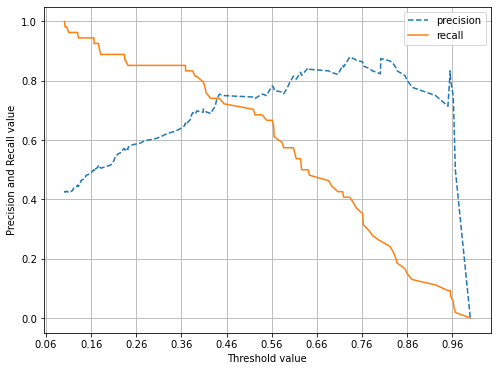

In [8]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [11]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

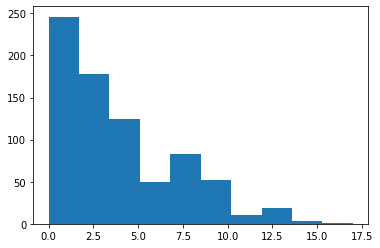

In [13]:
plt.hist(diabetes_data['Pregnancies'], bins=10)

In [20]:
zero_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                 'DiabetesPedigreeFunction','Age']

total_count = diabetes_data['Pregnancies'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 건수는 {1}, 총 {2} 퍼센트'.format(feature, zero_count, zero_count/total_count))
    


Pregnancies 건수는 111, 총 0.14453125 퍼센트
Glucose 건수는 0, 총 0.0 퍼센트
BloodPressure 건수는 0, 총 0.0 퍼센트
SkinThickness 건수는 0, 총 0.0 퍼센트
Insulin 건수는 0, 총 0.0 퍼센트
BMI 건수는 0, 총 0.0 퍼센트
DiabetesPedigreeFunction 건수는 0, 총 0.0 퍼센트
Age 건수는 0, 총 0.0 퍼센트


In [21]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)


오차행렬
[[90 10]
 [15 39]]
정확도:0.8377, 정밀도:0.7959, 재현율:0.7222, F1:0.7573, AUC:0.8893


In [22]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [23]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_eval_by_threshold(y_test, pred_proba.reshape(-1,1), thresholds)


임계값: 0.3
오차행렬
[[74 26]
 [ 7 47]]
정확도:0.7857, 정밀도:0.6438, 재현율:0.8704, F1:0.7402, AUC:0.8893
임계값: 0.33
오차행렬
[[81 19]
 [ 8 46]]
정확도:0.8247, 정밀도:0.7077, 재현율:0.8519, F1:0.7731, AUC:0.8893
임계값: 0.36
오차행렬
[[83 17]
 [ 9 45]]
정확도:0.8312, 정밀도:0.7258, 재현율:0.8333, F1:0.7759, AUC:0.8893
임계값: 0.39
오차행렬
[[85 15]
 [11 43]]
정확도:0.8312, 정밀도:0.7414, 재현율:0.7963, F1:0.7679, AUC:0.8893
임계값: 0.42
오차행렬
[[85 15]
 [13 41]]
정확도:0.8182, 정밀도:0.7321, 재현율:0.7593, F1:0.7455, AUC:0.8893
임계값: 0.45
오차행렬
[[86 14]
 [13 41]]
정확도:0.8247, 정밀도:0.7455, 재현율:0.7593, F1:0.7523, AUC:0.8893
임계값: 0.48
오차행렬
[[88 12]
 [15 39]]
정확도:0.8247, 정밀도:0.7647, 재현율:0.7222, F1:0.7429, AUC:0.8893
임계값: 0.5
오차행렬
[[90 10]
 [15 39]]
정확도:0.8377, 정밀도:0.7959, 재현율:0.7222, F1:0.7573, AUC:0.8893


In [24]:
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba.reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba)

오차행렬
[[88 12]
 [15 39]]
정확도:0.8247, 정밀도:0.7647, 재현율:0.7222, F1:0.7429, AUC:0.8893
